# Mathematical Modeling - CSTR 

#### Model

In [114]:
from scipy.integrate import odeint as solver
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
t = np.linspace(600,3600,6)

In [121]:
def model(y,t):
    
    alpha = 0.0005
    k = 0.0001
    n = 0.0004
    sig = 0.012
    gamma = 0.0002
    
    #inlets, outlet
    s1 = 0.01
    s2 = 0.005
    s3 = 0.015
    
    #initials
    mS = 1
    mI = 0.01
    mP1 = 0.07
    mP2 = 0.001
    
    #birth death equations
    bP1 = alpha * mP1
    dP1 = (k*mP1*mP2) + (n*mI)
    bP2 = alpha*mP2
    dP2 = (k*mP1*mP2) + (n*mI)
    
    #ODEs
    dy1dt = (s1 + s2) - s3
    dy2dt = s1 - s3
    dy3dt = bP1 - dP1    
    dy4dt = bP2 - dP2
    
    dydt = [dy1dt, dy2dt, dy3dt, dy4dt]
    
    return dydt

# initial values
y__ = [1.,0.01,0.07,0.015]

# solve ODEs
y = solver(model, y__, t)

#### Visualizations

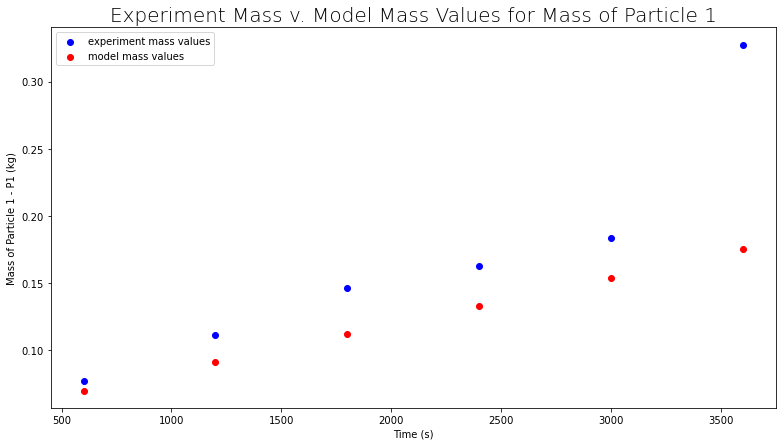

In [122]:
# values of mass of P1 measured after experiment
x_ = [600,1200,1800,2400,3000,3600]
y_ = [0.0769,0.1112,0.1465,0.1629,0.1832,0.3275]




# plotting values of mass from experiment againt values obtained from model
plt.figure(figsize=(13,7))

plt.scatter(x_,y_, c='b', label='experiment mass values')
plt.scatter(t,y[:,2], c='r', label='model mass values')

plt.legend()
plt.title('Experiment Mass v. Model Mass Values for Mass of Particle 1', fontdict = {'fontsize': 20,'fontweight': 20})
plt.xlabel('Time (s)')
plt.ylabel('Mass of Particle 1 - P1 (kg)')
plt.show()